In [68]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

path_pickle = "/home/hosseinkhan/Documents/work/phd/git_repositories/doe4rl/experiments/mlruns/1/e1ee24acaf8b4ad99433aa1e6b524280/barl_data/info.pkl"

# Load the pickled data.
with open(path_pickle, 'rb') as file:
    data = pickle.load(file)

In [69]:
# "Model MSE (current real MPC)" is the MSE between y and y_hat, i.e. s' ~ T(s,a) and s' ~ GP(s,a) for a MPC trajectory on the GP model SxA applied to the true dynamics
# "Model MSE (random test set)"  is the MSE between y and y_hat, i.e. s' ~ T(s,a) and s' ~ GP(s,a) for a random test set SxA
# "Model MSE (GT MPC)" is the MSE between y and y_hat, i.e. s' ~ T(s,a) and s' ~ GP(s,a) for a MPC trajectory on the ground true dynamics SxA applied to the true dynamics, fixed at the beginning of the xp

In [70]:
{key: np.array(data[key]) for key in data.keys()}

/tmp/ipykernel_178438/2368025776.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  {key: np.array(data[key]) for key in data.keys()}


{'x': array([[-3.73710403e-01, -3.95242881e-01,  5.46125384e-01,
         -3.11166519e-01,  9.50000391e-01, -9.43791764e-01],
        [-1.30771489e-01, -2.89835970e-02,  4.87183401e-01,
         -5.68551528e-01,  2.46786272e-01, -6.77004627e-02],
        [-1.18897843e-01, -1.64305807e-01, -4.64941754e-02,
          9.79265153e-02,  8.31781007e-01, -6.41327779e-01],
        [-2.13345048e-01,  2.07110473e-01,  3.52979184e-01,
         -5.52187196e-01, -3.18925182e-01, -4.22092478e-01],
        [-1.71336510e-01,  2.17239264e-02,  1.94058823e-01,
          6.72021674e-01,  7.92938311e-01, -1.15253895e-01],
        [ 3.03773407e-02,  1.77939410e-01,  3.99152329e-01,
         -5.67242499e-01, -8.13913180e-01, -7.71301375e-01],
        [-9.17741825e-02, -9.90258219e-02,  4.59184971e-01,
          8.06380318e-01, -7.88118810e-01, -7.46922404e-01],
        [-2.95742439e-01, -4.96831323e-01,  3.12270275e-01,
          5.43807501e-01, -9.37207043e-01,  5.42742993e-01],
        [-2.07481821e-01, -

In [71]:
list_name_mse_keys = ["Model MSE (current real MPC)", "Model MSE (random test set)", "Model MSE (GT MPC)"]
list_new_name_mse_keys = ["model_mse_current_real_mpc", "model_mse_random_test_set", "model_mse_gt_mpc"]

In [72]:
df_model_mse = (pd.DataFrame([data[name_key] for name_key in list_name_mse_keys])
                .T
                .reset_index()
                .rename(columns={i: name_key for i, name_key in enumerate(list_new_name_mse_keys)})
                .rename(columns={"index": "iteration"})
                .melt(id_vars="iteration", var_name="mse_type", value_name="mse")
                )
df_model_mse

,iteration,mse_type,mse
0,0,model_mse_current_real_mpc,0.057636
1,1,model_mse_current_real_mpc,0.000846
2,2,model_mse_current_real_mpc,0.001964
3,3,model_mse_current_real_mpc,0.002195
4,4,model_mse_current_real_mpc,0.001570
...,...,...,...
415,135,model_mse_gt_mpc,0.000002
416,136,model_mse_gt_mpc,0.000002
417,137,model_mse_gt_mpc,0.000002
418,138,model_mse_gt_mpc,0.000002


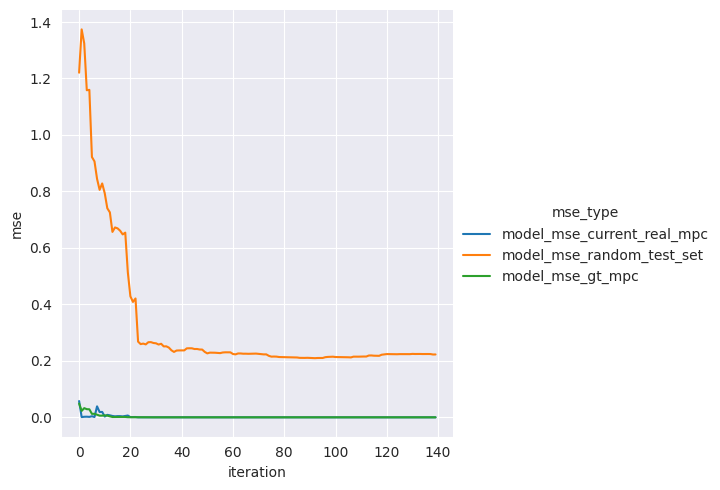

In [73]:
sns.relplot(data=df_model_mse, x="iteration", y="mse", hue="mse_type", kind="line")

<AxesSubplot: title={'center': 'Returns'}, xlabel='Iteration', ylabel='Return'>

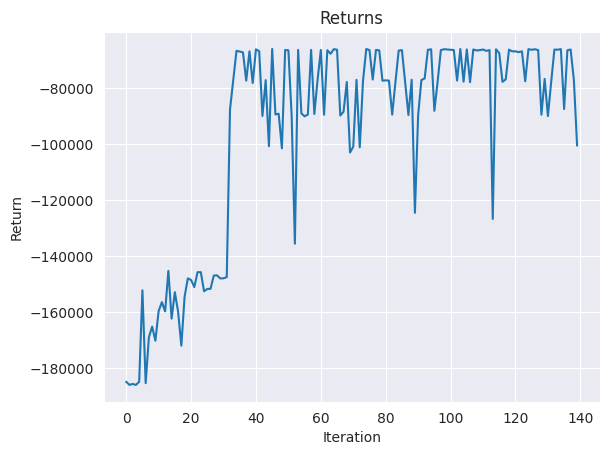

In [74]:
series_returns = pd.Series(data["Eval Returns"], name="returns")
series_returns.plot(title="Returns", xlabel="Iteration", ylabel="Return")

<AxesSubplot: title={'center': 'EIG'}, xlabel='Iteration', ylabel='EIG'>

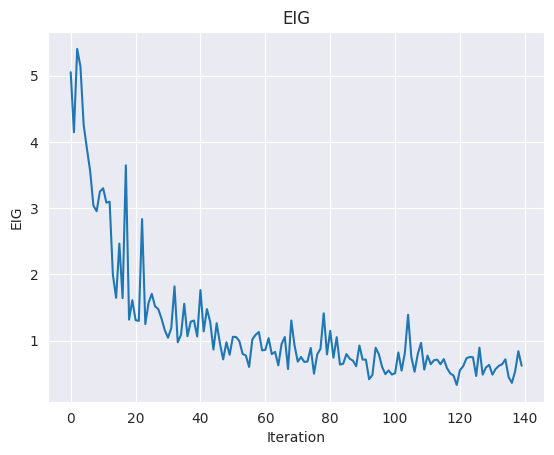

In [75]:
series_eig = pd.Series(data["Acquisition Function Value"], name="eig") 
series_eig.plot(title="EIG", xlabel="Iteration", ylabel="EIG")

In [76]:
list_name_likelihood_keys = ["Model Likelihood (random test set)", "Model Likelihood (GT MPC)"]
list_new_name_likelihood_keys = ["model_likelihood_random_test_set", "model_likelihood_gt_mpc"]

In [77]:
df_model_likelihood = (pd.DataFrame([data[name_key] for name_key in list_name_likelihood_keys])
                .T
                .reset_index()
                .rename(columns={i: name_key for i, name_key in enumerate(list_new_name_likelihood_keys)})
                .rename(columns={"index": "iteration"})
                .melt(id_vars="iteration", var_name="likelihood_type", value_name="likelihood")
                )

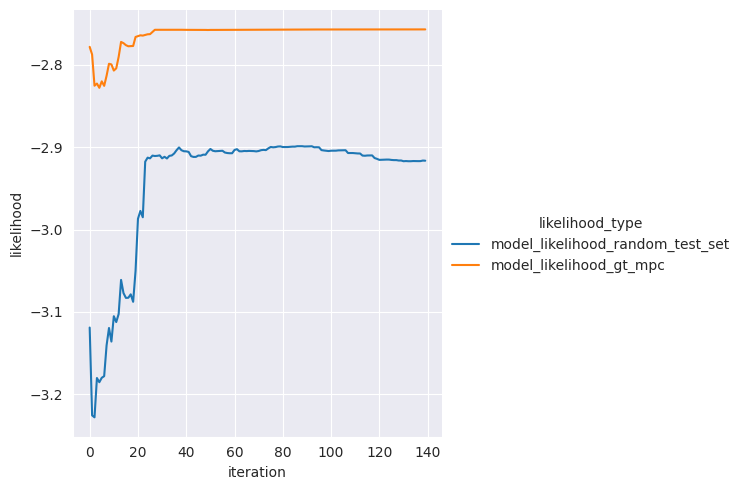

In [78]:
sns.relplot(data=df_model_likelihood, x="iteration", y="likelihood", hue="likelihood_type", kind="line")